# System3_comparison.ipynb

JRM33モデルのフットプリント位置予測を用いる。

### 衛星のSystem III経度に対して、フットプリント位置予測をプロットする。

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
from TScmap import TScmap

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })

In [8]:
satovalN = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

satovalS = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

In [9]:
# EFP見えている
OBS_s3moonN = np.array([
    139,102,92.5,170.5
])

OBS_s3efpN = np.array([
    156.5,143.5,140,169.5
])

OBS_s3moonS = np.array([
    93,71,90.5
])

OBS_s3efpS = np.array([
    77,64,76
])

# EFP見えなかった
NO_s3moonN = np.array([
    266.5,158,194.5,211,189,195,189.5,228,192
])

NO_s3efpN = np.array([
    225,164.5,180.5,188.5,178,180.5,177,198,179.5
])

NO_s3moonS = np.array([
    309,338.5,333.5,320
])

NO_s3efpS = np.array([
    325.5,353,346,334.5
])

In [10]:
# 北半球
wlonN0 = copy.copy(satovalN.wlon[0:4])
wlonN1 = copy.copy(satovalN.wlon[2:])

euwlonN0 = copy.copy(satovalN.euwlon[0:4])
euwlonN1 = copy.copy(satovalN.euwlon[2:])
euwlonN0[3] += 360
euwlonN1[0] += -360

# 南半球
print(satovalS.wlon)
print(satovalS.euwlon)

wlonS0 = copy.copy(satovalS.wlon[0:-1])
wlonS1 = copy.copy(satovalS.wlon[-3:])

euwlonS0 = copy.copy(satovalS.euwlon[0:-1])
euwlonS1 = copy.copy(satovalS.euwlon[-3:])
euwlonS0[-1] += 360
euwlonS1[0] += -360

print(euwlonS1)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360]
[  7.7   11.88  16.1   20.36  24.67  29.02  33.37  37.68  41.88  45.92
  49.76  53.41  56.87  60.2   63.41  66.55  69.65  72.73  75.83  78.95
  82.12  85.36  88.68  92.11  95.68  99.42 103.4  107.64 112.19 117.04
 122.18 127.6  133.32 139.4  145.96 153.2  161.31 170.4  180.41 190.94
 201.39 211.26 220.28 228.46 235.92 242.83 249.32 255.48 261.39 267.08
 272.55 277.8  282.84 287.68 292.34 296.85 301.24 305.55 309.8  314.01
 318.19 322.36 326.51 330.65 334.78 338.9  343.   347.11 351.21 355.31
 359.43   3.55   7.7 ]
[-0.57  3.55  7.7 ]


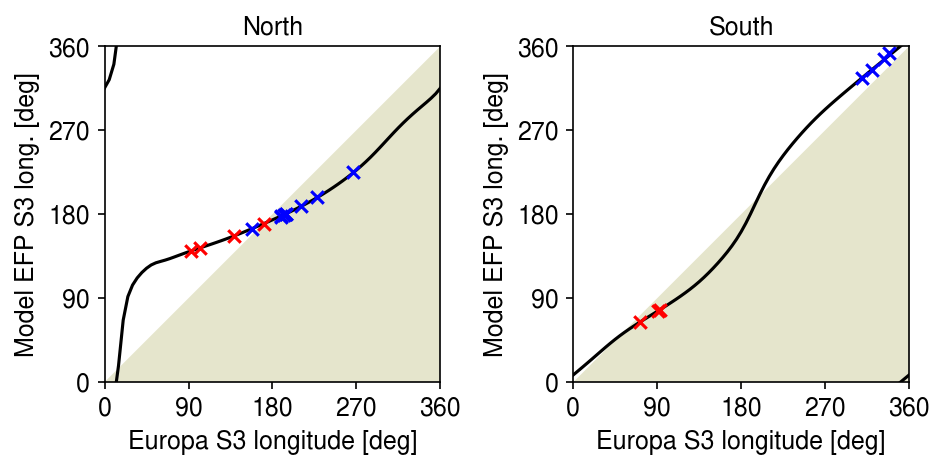

In [11]:
fontsize = 12
fig, ax = plt.subplots(1,2,dpi=150)
ax[0].set_aspect('equal')
ax[0].set_title('North', fontsize=fontsize)
ax[0].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[0].set_ylabel('Model EFP S3 long. [deg]', fontsize=fontsize)
ax[0].set_xlim(0,360)
ax[0].set_ylim(0,360)
ax[0].set_xticks(np.linspace(0,360,5))
ax[0].set_xticklabels(np.linspace(0,360,5,dtype=int))
ax[0].set_yticks(np.linspace(0,360,5))
ax[0].set_yticklabels(np.linspace(0,360,5,dtype=int))
ax[0].tick_params(axis='x', labelsize=fontsize)
ax[0].tick_params(axis='y', labelsize=fontsize)
# ax[0].plot(satovalN.wlon, satovalN.euwlon, zorder=0.5)
ax[0].plot(wlonN0, euwlonN0, color='k', zorder=0.5)
ax[0].plot(wlonN1, euwlonN1, color='k', zorder=0.5)

for i in range(OBS_s3moonN.size):
    ax[0].scatter(OBS_s3moonN[i], OBS_s3efpN[i], marker='x', color='r', zorder=1)
for i in range(NO_s3moonN.size):
    ax[0].scatter(NO_s3moonN[i], NO_s3efpN[i], marker='x', color='b', zorder=1)
# ax[0].plot(np.arange(0,360+1,5),np.arange(0,360+1,5), color='k', zorder=0.5)
ax[0].fill_between([0, 360], [0, 360], facecolor='olive', alpha=0.20, zorder=0.1)

#ax1 = ax[0].twinx()
#ax1.set_ylabel('$B_r$ [nT]')
#ax1.plot(np.degrees(2*np.pi-phi),Br, color='gray', zorder=0.5)

ax[0].set_box_aspect(1)

ax[1].set_aspect('equal')
ax[1].set_title('South', fontsize=fontsize)
ax[1].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[1].set_ylabel('Model EFP S3 long. [deg]', fontsize=fontsize)
ax[1].set_xlim(0,360)
ax[1].set_ylim(0,360)
ax[1].set_xticks(np.linspace(0,360,5))
ax[1].set_xticklabels(np.linspace(0,360,5,dtype=int))
ax[1].set_yticks(np.linspace(0,360,5))
ax[1].set_yticklabels(np.linspace(0,360,5,dtype=int))
ax[1].tick_params(axis='x', labelsize=fontsize)
ax[1].tick_params(axis='y', labelsize=fontsize)
# ax[1].plot(satovalS.wlon, satovalS.euwlon, zorder=0.5)
ax[1].plot(wlonS0, euwlonS0, color='k', zorder=0.5)
ax[1].plot(wlonS1, euwlonS1, color='k', zorder=0.5)

for i in range(OBS_s3moonS.size):
    ax[1].scatter(OBS_s3moonS[i], OBS_s3efpS[i], marker='x', color='r', zorder=1)
for i in range(NO_s3moonS.size):
    ax[1].scatter(NO_s3moonS[i], NO_s3efpS[i], marker='x', color='b', zorder=1)
# ax[1].plot(np.arange(0,360+1,5),np.arange(0,360+1,5), color='k', zorder=0.5)
ax[1].fill_between([0, 360], [0, 360], facecolor='olive', alpha=0.20, zorder=0.1)

#ax1 = ax[1].twinx()
#ax1.set_ylabel('$B_r$ [nT]')
#ax1.plot(np.degrees(2*np.pi-phi),Br, color='gray', zorder=0.5)

ax[1].set_box_aspect(1)

fig.tight_layout()
plt.show()